In [1]:
import pennylane as qml

In [2]:
from pennylane import numpy as np

In [3]:
# Array with all of the energies that are calculated
vqe_energies = []
# These are the distances I want to test
distances = [0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9]
print(distances)

[0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9]


In [4]:
for dist in distances:
    # Defining all needed information for the generate_hamiltonian function
    name = 'LiH-{:}'.format(dist)
    geometry = 'Lithium_Hydride/LiH-{:}.xyz'.format(dist)
    charge = 0
    multiplicity = 1
    basis_set = 'sto-3g'
    
    ###
    
    # Calling the generate_hamiltonian function from the pennylane module. Returns two values, h the hamiltonian and 
    # num_qubits the number of needed qubits
    h, num_qubits = qml.qchem.generate_hamiltonian(name, geometry, charge, multiplicity, basis_set, n_active_electrons = 2, n_active_orbitals = 2, mapping = 'jordan_wigner')
    
    ###
    
    # Defines the pqrticular quantum device to simulate qubit states. 'default.qubit' is a simple state simulator.
    dev = qml.device('default.qubit', wires = num_qubits)

    # Defines the circuit gates to allow optimization to be effective. Needs to be complex to prepare the ground state,
    # and simple enough to optimize.
    def circuit(params, wires):
        # Defines the initial basis of the qubits
        qml.BasisState(np.array([1, 1, 0, 0]), wires = wires)
        # Applies rotational gates on all wires with parameter i
        for i in wires:
            qml.Rot(*params[i], wires = i)
        # Applies CNOT entanglement gates
        qml.CNOT(wires = [2, 3])
        qml.CNOT(wires = [2, 0])
        qml.CNOT(wires = [3, 1])
    
    ###
    
    # Calling the VQECos function from the pennylane module. Returns the cost function of the optimization based on the
    # quantum circuit, the hamiltonian, and the simulator
    cost_function = qml.VQECost(circuit, h, dev)

    # This is the classical optimization work. Using gradiant descent with a step size of 0.4. Parameters are based on a
    # normal distribution about the center (0), with a spread (pi), and with an output of (num_quits * 3). 
    opt = qml.GradientDescentOptimizer(stepsize = 0.3)
    np.random.seed(0)
    params = np.random.normal(0, np.pi, (num_qubits, 3))
    
    ###
    
    max_iterations = 200
    # Convergence tolerance tells us how close we want the optimization to be
    conv_tol = 1e-06

    # Checks the cost of the random parameters
    current_energy = cost_function(params)
    for n in range(max_iterations):
        # Create new parameters based on the gradient descent optimizer using the cost_function by using the defined
        # stepsize on the original parameters
        params = opt.step(cost_function, params)
        # Caluculate the cost function of new parameters
        energy = cost_function(params)
        # Caluculate the convergence
        conv = np.abs(energy - current_energy)

        if n % 20 == 0:
            print('Iteration = {0}, Ground-state energy = {1} Ha, Convergence parameter = {2} Ha'.format(n, energy, conv))

        # If convergence is less than equal to convergence total stop
        if conv <= conv_tol:
            break
        
        current_energy = energy

    print('Final convergence parameter = {0} Ha'.format(conv))
    print('Final value of the ground-state energy = {0} Ha'.format(energy))
    print('Interatomic Distance: ', np.round(dist, 2), 'VQE Result: ', energy)
    print()
    
    # Adding all the energies to the string
    vqe_energies.append(energy)
    
    
    

Iteration = 0, Ground-state energy = -5.740474384787362 Ha, Convergence parameter = 0.007505667451475517 Ha
Iteration = 20, Ground-state energy = -5.825362393775816 Ha, Convergence parameter = 0.00210792441202301 Ha
Iteration = 40, Ground-state energy = -5.846362401688737 Ha, Convergence parameter = 0.0004587485292839588 Ha
Iteration = 60, Ground-state energy = -5.8509118824718 Ha, Convergence parameter = 0.00010447780416544816 Ha
Iteration = 80, Ground-state energy = -5.852053754392078 Ha, Convergence parameter = 3.107913008104646e-05 Ha
Iteration = 100, Ground-state energy = -5.852447932913663 Ha, Convergence parameter = 1.2878448794495512e-05 Ha
Iteration = 120, Ground-state energy = -5.852631513449954 Ha, Convergence parameter = 6.707452459231433e-06 Ha
Iteration = 140, Ground-state energy = -5.852733466053645 Ha, Convergence parameter = 3.945788257020411e-06 Ha
Iteration = 160, Ground-state energy = -5.8527958498206925 Ha, Convergence parameter = 2.5089118524945775e-06 Ha
Iteratio

Iteration = 0, Ground-state energy = -7.716763434864763 Ha, Convergence parameter = 0.00847040882499428 Ha
Iteration = 20, Ground-state energy = -7.812980246253489 Ha, Convergence parameter = 0.0022559010306366645 Ha
Iteration = 40, Ground-state energy = -7.835090971760934 Ha, Convergence parameter = 0.00048535276248617976 Ha
Iteration = 60, Ground-state energy = -7.839940610178541 Ha, Convergence parameter = 0.00011025690966182111 Ha
Iteration = 80, Ground-state energy = -7.841078478553123 Ha, Convergence parameter = 2.733345732686132e-05 Ha
Iteration = 100, Ground-state energy = -7.84137514368645 Ha, Convergence parameter = 7.69991630278355e-06 Ha
Iteration = 120, Ground-state energy = -7.8414641273125465 Ha, Convergence parameter = 2.5129685878866326e-06 Ha
Final convergence parameter = 9.815268127155719e-07 Ha
Final value of the ground-state energy = -7.841494046924356 Ha
Interatomic Distance:  1.9 VQE Result:  -7.841494046924356

Iteration = 0, Ground-state energy = -7.70440671708

Iteration = 0, Ground-state energy = -7.627017215678437 Ha, Convergence parameter = 0.0035975224140329942 Ha
Iteration = 20, Ground-state energy = -7.672810289996993 Ha, Convergence parameter = 0.0014578334900630097 Ha
Iteration = 40, Ground-state energy = -7.691651828832865 Ha, Convergence parameter = 0.0005882619135277878 Ha
Iteration = 60, Ground-state energy = -7.699066172448761 Ha, Convergence parameter = 0.00022675774087410616 Ha
Iteration = 80, Ground-state energy = -7.701935374031847 Ha, Convergence parameter = 8.934049168995983e-05 Ha
Iteration = 100, Ground-state energy = -7.7031048566444 Ha, Convergence parameter = 3.8350020709287946e-05 Ha
Iteration = 120, Ground-state energy = -7.703636892915505 Ha, Convergence parameter = 1.8793889982937628e-05 Ha
Iteration = 140, Ground-state energy = -7.70391699875694 Ha, Convergence parameter = 1.0731259839857898e-05 Ha
Iteration = 160, Ground-state energy = -7.704089109858736 Ha, Convergence parameter = 7.1154404794882e-06 Ha
Iteratio

Iteration = 160, Ground-state energy = -7.754583038238131 Ha, Convergence parameter = 1.394324049108775e-06 Ha
Iteration = 180, Ground-state energy = -7.754611642111828 Ha, Convergence parameter = 1.487347554451901e-06 Ha
Final convergence parameter = 1.667295857821216e-06 Ha
Final value of the ground-state energy = -7.754641617098997 Ha
Interatomic Distance:  4.5 VQE Result:  -7.754641617098997

Iteration = 0, Ground-state energy = -7.600545228876151 Ha, Convergence parameter = 0.005952599284687388 Ha
Iteration = 20, Ground-state energy = -7.70550148355592 Ha, Convergence parameter = 0.003940452692988039 Ha
Iteration = 40, Ground-state energy = -7.749581719197169 Ha, Convergence parameter = 0.001014772180393031 Ha
Iteration = 60, Ground-state energy = -7.759187831496666 Ha, Convergence parameter = 0.00019791812691494215 Ha
Iteration = 80, Ground-state energy = -7.761088417293962 Ha, Convergence parameter = 4.101117571497781e-05 Ha
Iteration = 100, Ground-state energy = -7.761500423020

In [5]:
print(vqe_energies)

[-5.852864553166991, -7.028799664965524, -7.486065541480486, -7.70585124795046, -7.808847597838569, -7.852080830630109, -7.86352908105845, -7.857393467355106, -7.841494046924356, -7.820385619295091, -7.796844419485584, -7.772721394563266, -7.749539080007511, -7.728917703219988, -7.713022744260409, -7.704306185390001, -7.704168416129834, -7.7115875090838735, -7.723634314022429, -7.736338649437434, -7.7471426062721385, -7.754641617098997, -7.761737175963459, -7.777903042415273]


In [6]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

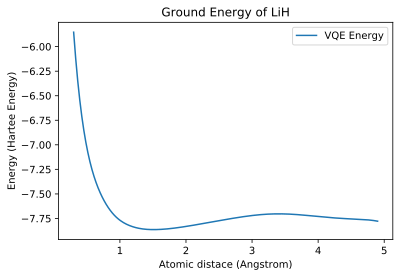

In [7]:
# Draws a plot of the ground energy of the H2 molecule based on the atomic distace
xnew = np.linspace(distances[0], distances[len(distances) - 1], 300) 

spl = make_interp_spline(distances, vqe_energies, k=5)
vqe_energy_smooth = spl(xnew)

plt.plot(xnew, vqe_energy_smooth, label = 'VQE Energy')
plt.xlabel('Atomic distace (Angstrom)')
plt.ylabel('Energy (Hartee Energy)')
plt.title('Ground Energy of LiH')
plt.legend()
plt.show()